In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
from nest import overlap_try as overlap
from nest import detectors   
from astropy.cosmology import Planck15
from nest import pls_try as pls
import matplotlib.cm as cm

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'

Check PSD

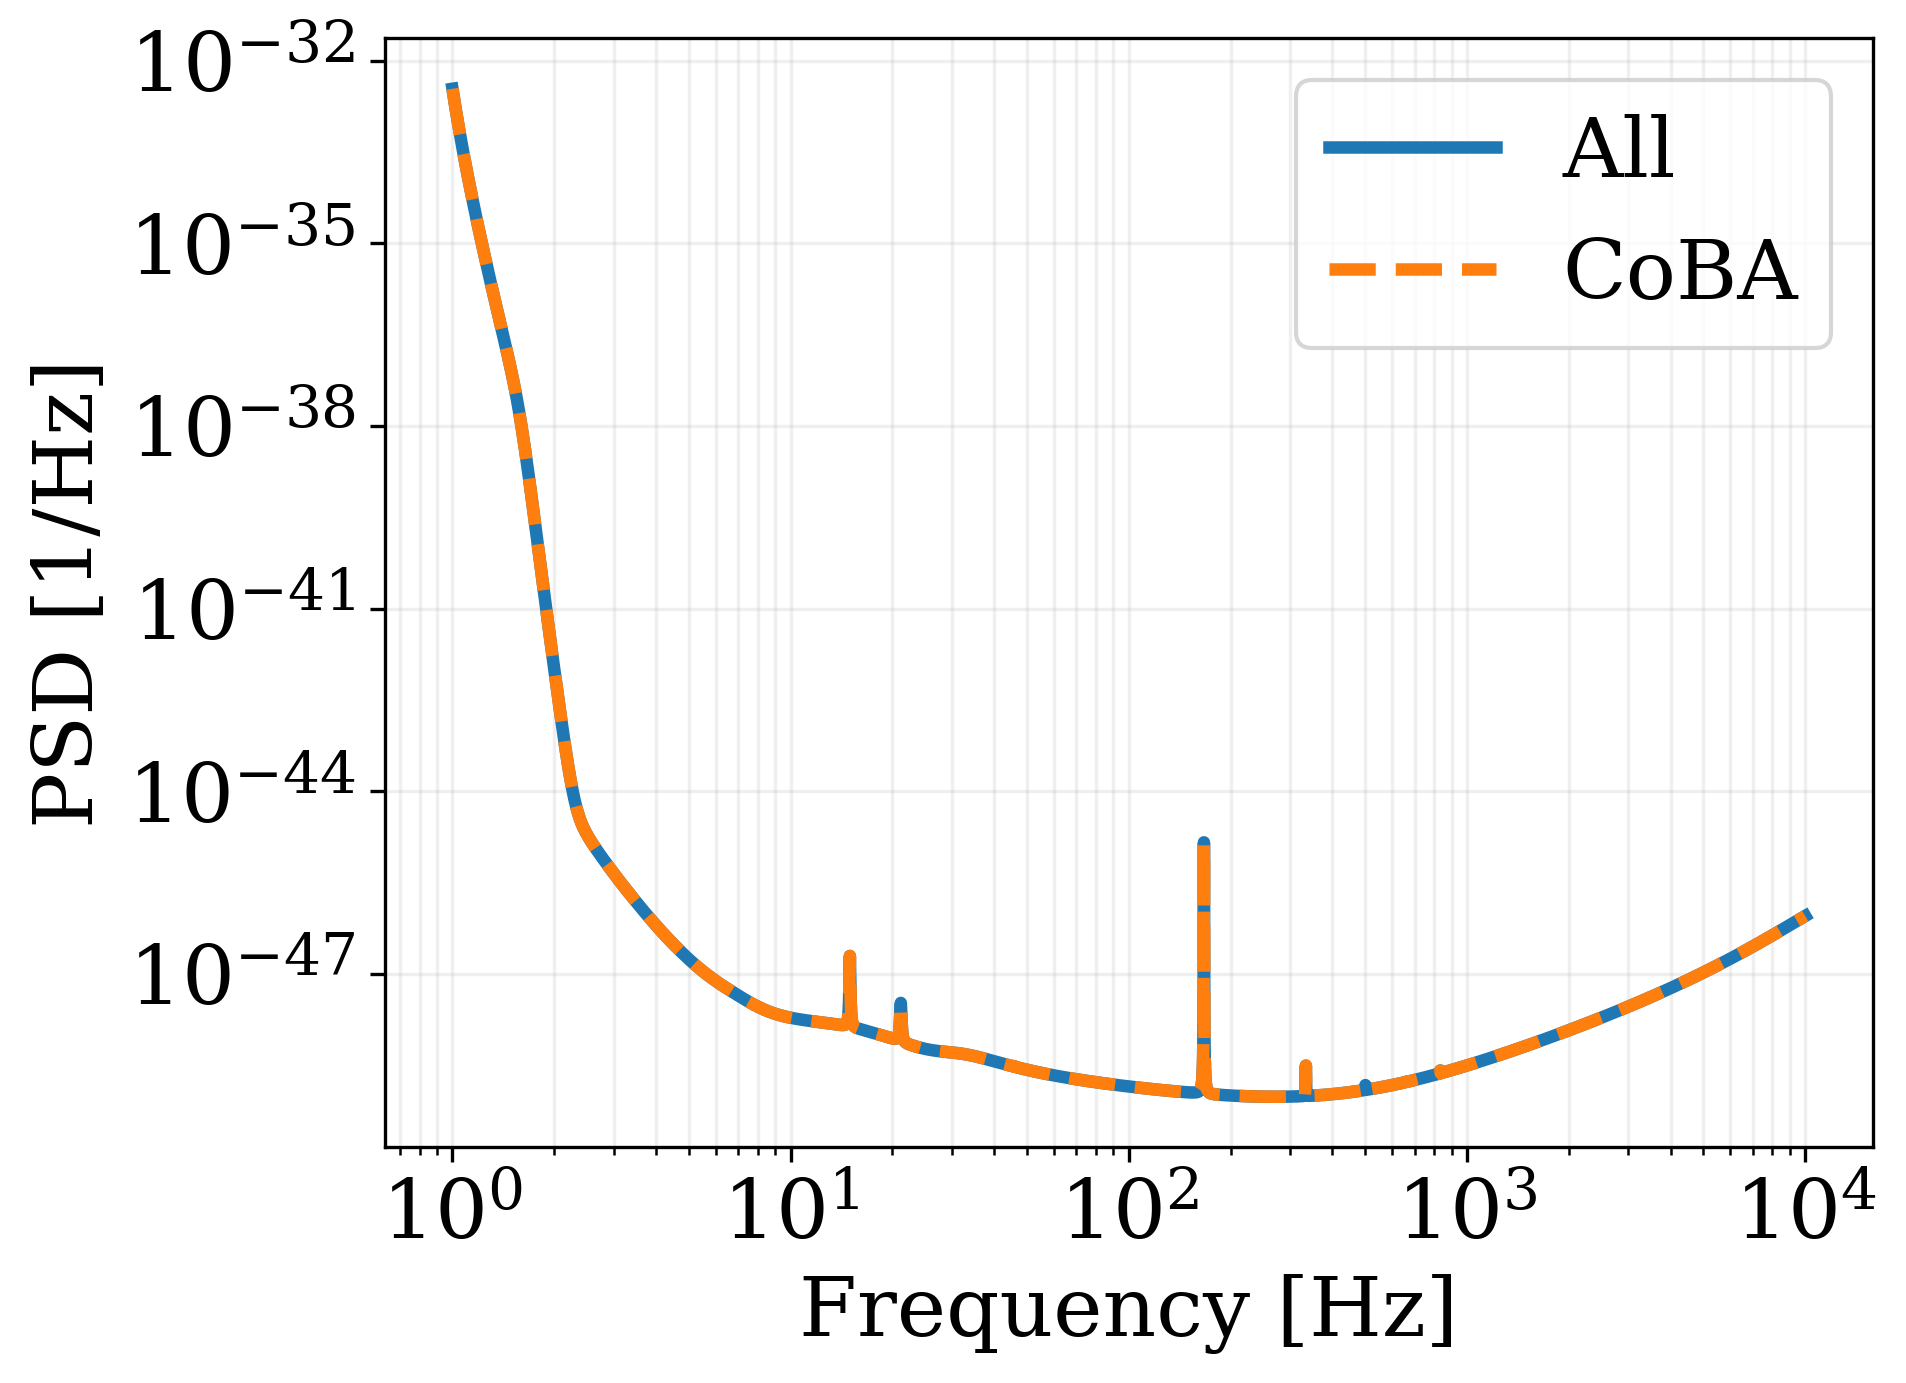

In [7]:
f, psd_hf, psd_lf, psd_all = np.loadtxt('psd/18213_ET10kmcolumns.txt', unpack=True)
f, psd_CoBA = np.loadtxt('/Users/ic/Desktop/GWBird/psd/ET_Sh_coba.txt', unpack=True)

# plt.loglog(f, psd_lf, label='Low Frequency')
# plt.loglog(f, psd_hf, label='High Frequency')
plt.loglog(f, psd_all, label='All')
plt.loglog(f, psd_CoBA**2, label='CoBA', linestyle='--')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [1/Hz]')
plt.legend()
plt.grid(alpha=0.2, which='both')
plt.show()


* ET $\Delta$

In [59]:
f = np.logspace(0, np.log10(2000), 1000)
beta_min = -40
beta_max = 40
fref = 100
snr = 1
Tobs = 1

pls_ET_triang = pls.find_pls('ET A', 'ET B', f, 't', beta_min, beta_max, fref, snr, Tobs, None)
pls_weighted_ET_triang = pls.find_pls_weighted('ET A', 'ET B', f, 't', beta_min, beta_max, fref, snr, Tobs, None)
f_ref, PLS_ref = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_T_10km_HFLFcryo.txt', unpack=True)


In [60]:
PLS_ref_new = np.interp(f, f_ref, PLS_ref)

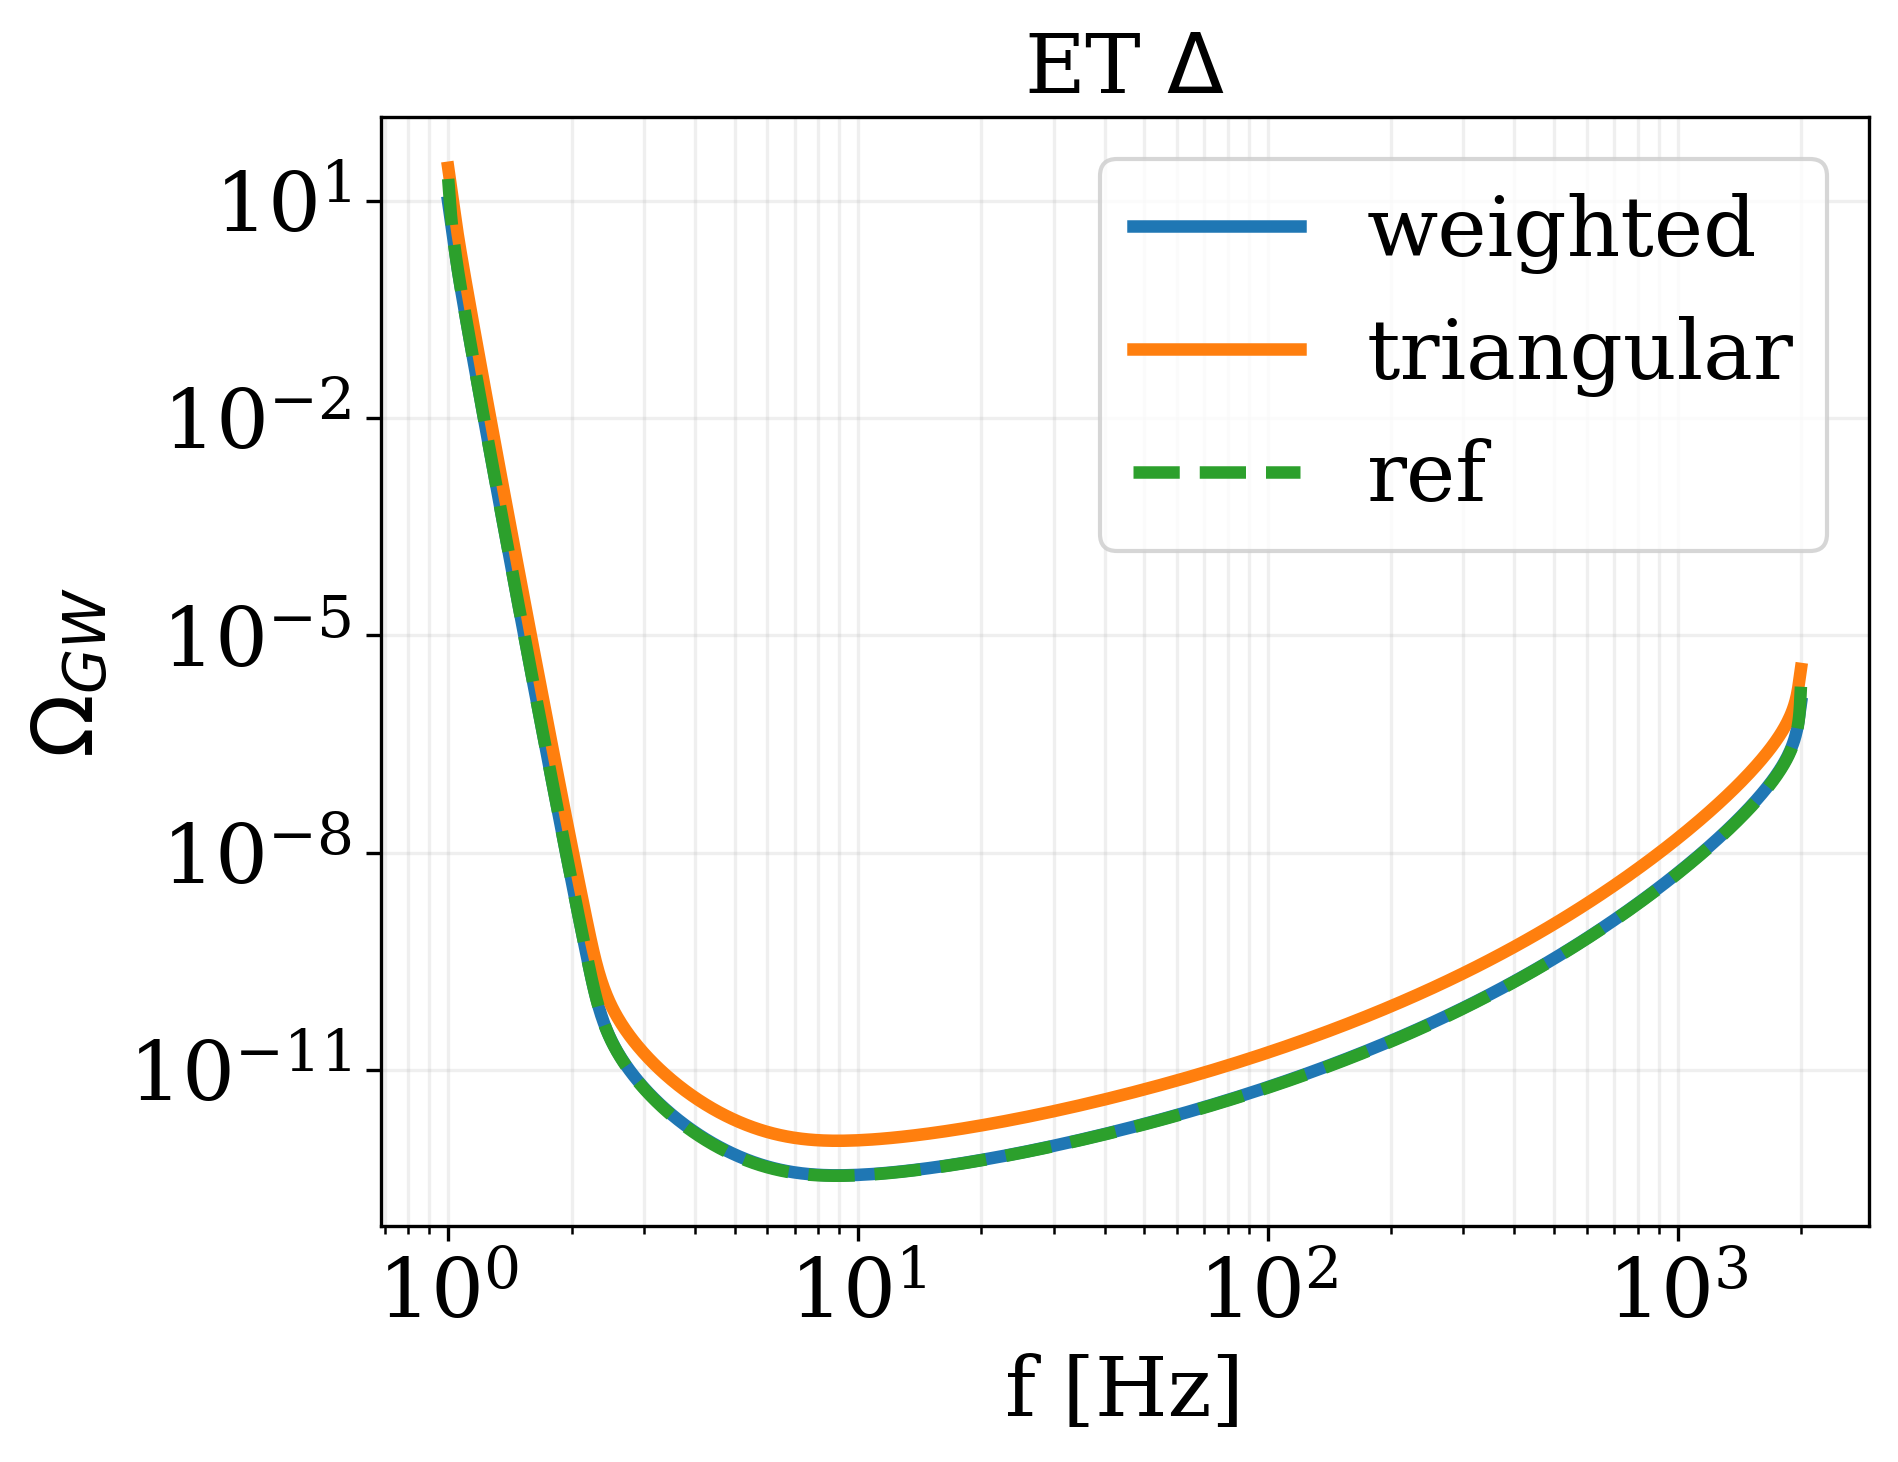

In [61]:
plt.loglog(f, pls_weighted_ET_triang, label='weighted')
plt.loglog(f, pls_ET_triang, label='triangular')
plt.loglog(f_ref, PLS_ref, label='ref', linestyle = '--')
plt.legend()
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.grid(alpha =0.2, which='both')
plt.title(r'ET $\Delta$')
plt.show()


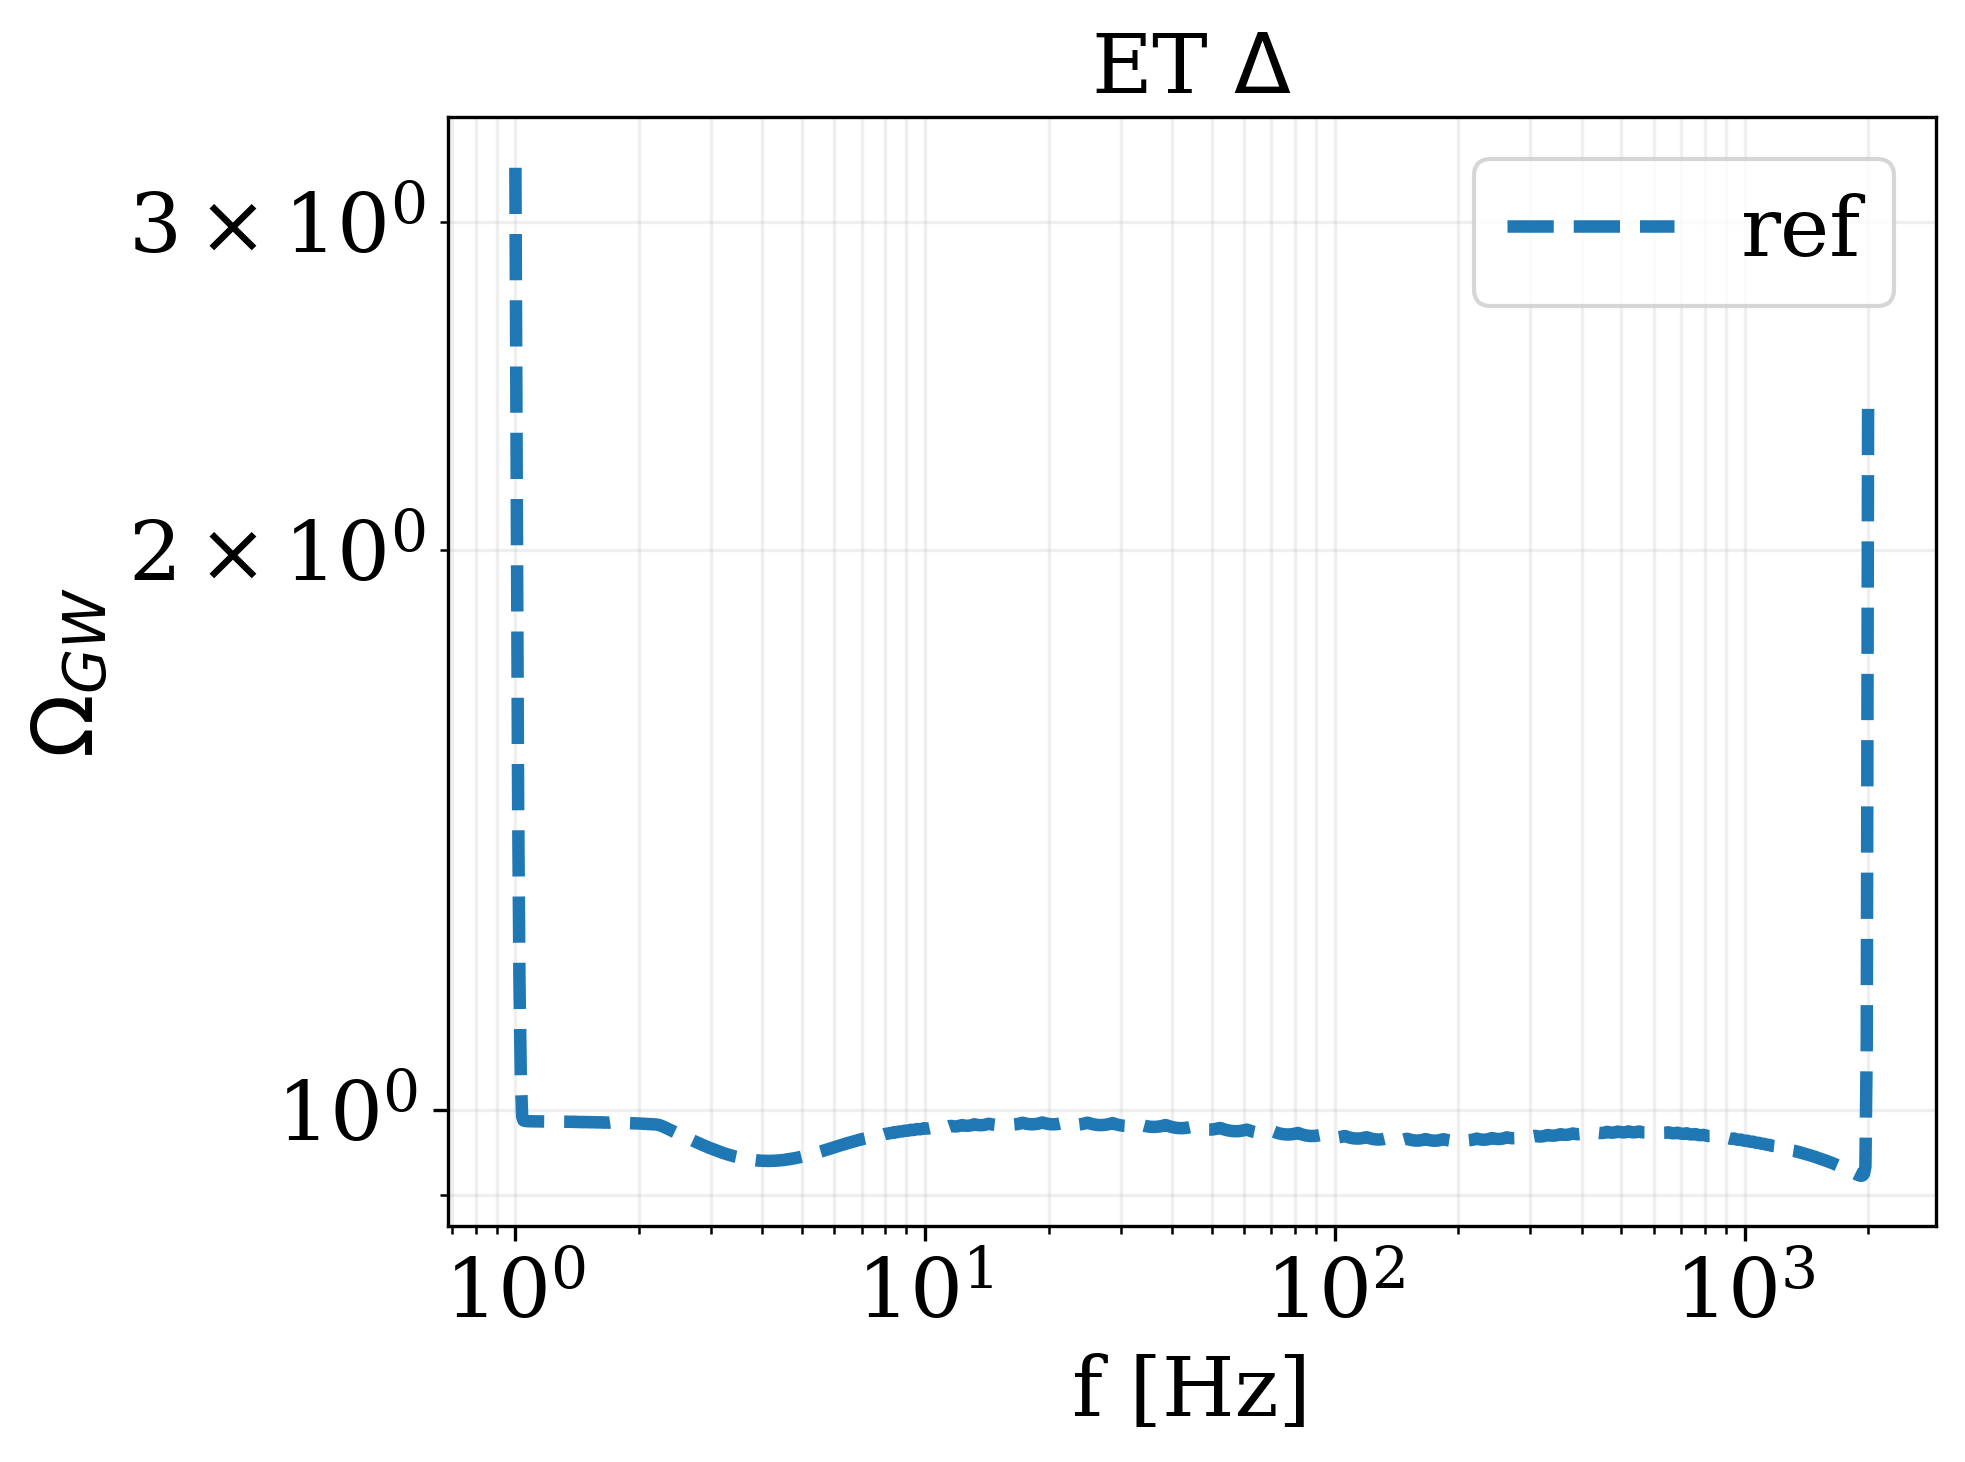

[0.76229131 0.68486247 0.59541589 0.53991466 0.51010972 0.49793925
 0.49673152 0.49662047 0.49655764 0.49652552 0.49650525 0.49649461
 0.4964841  0.49648081 0.49646877 0.49646309 0.49647749 0.49644978
 0.49645227 0.49646216 0.49646647 0.49645987 0.49644318 0.49642229
 0.49640734 0.49641201 0.49644666 0.4963953  0.49638973 0.49642604
 0.49637013 0.49639904 0.49636699 0.49636883 0.49636445 0.49635004
 0.49635498 0.49633796 0.49633707 0.49633277 0.49631347 0.49633786
 0.49628969 0.49635851 0.49627282 0.49631904 0.49627043 0.49626892
 0.49628978 0.49623534 0.4963063  0.49622556 0.49623786 0.49624507
 0.49619615 0.49626942 0.49618538 0.49619532 0.49620727 0.49615358
 0.49622173 0.49614412 0.49614985 0.49616424 0.49610949 0.49617903
 0.49609646 0.49611022 0.49610448 0.49606691 0.49612571 0.49604241
 0.49609226 0.49602917 0.4960442  0.49601958 0.49600901 0.4960069
 0.49598185 0.49598634 0.49596018 0.49595634 0.4959452  0.49592016
 0.49594362 0.49588779 0.49591    0.49587843 0.49584959 0.49586

In [47]:
plt.loglog(f, np.abs(pls_weighted_ET_triang- PLS_ref_new)/pls_weighted_ET_triang, label='ref', linestyle = '--')
plt.legend()
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.grid(alpha =0.2, which='both')
plt.title(r'ET $\Delta$')
plt.show()

print(np.abs(pls_weighted_ET_triang- PLS_ref_new)/PLS_ref_new)

Note: there is agreement with the ref and weighted if I put 10 as a coefficient in Omega effective.

In [201]:
f = np.logspace(0, 5, 1000)
pls_weighted_ET_triang_t = pls.find_pls_weighted('ET A', 'ET B', f, 't', beta_min, beta_max, fref, snr, Tobs, None)
pls_weighted_ET_triang_v = pls.find_pls_weighted('ET A', 'ET B', f, 'v', beta_min, beta_max, fref, snr, Tobs, None)
pls_weighted_ET_triang_s = pls.find_pls_weighted('ET A', 'ET B', f, 's', beta_min, beta_max, fref, snr, Tobs, None)


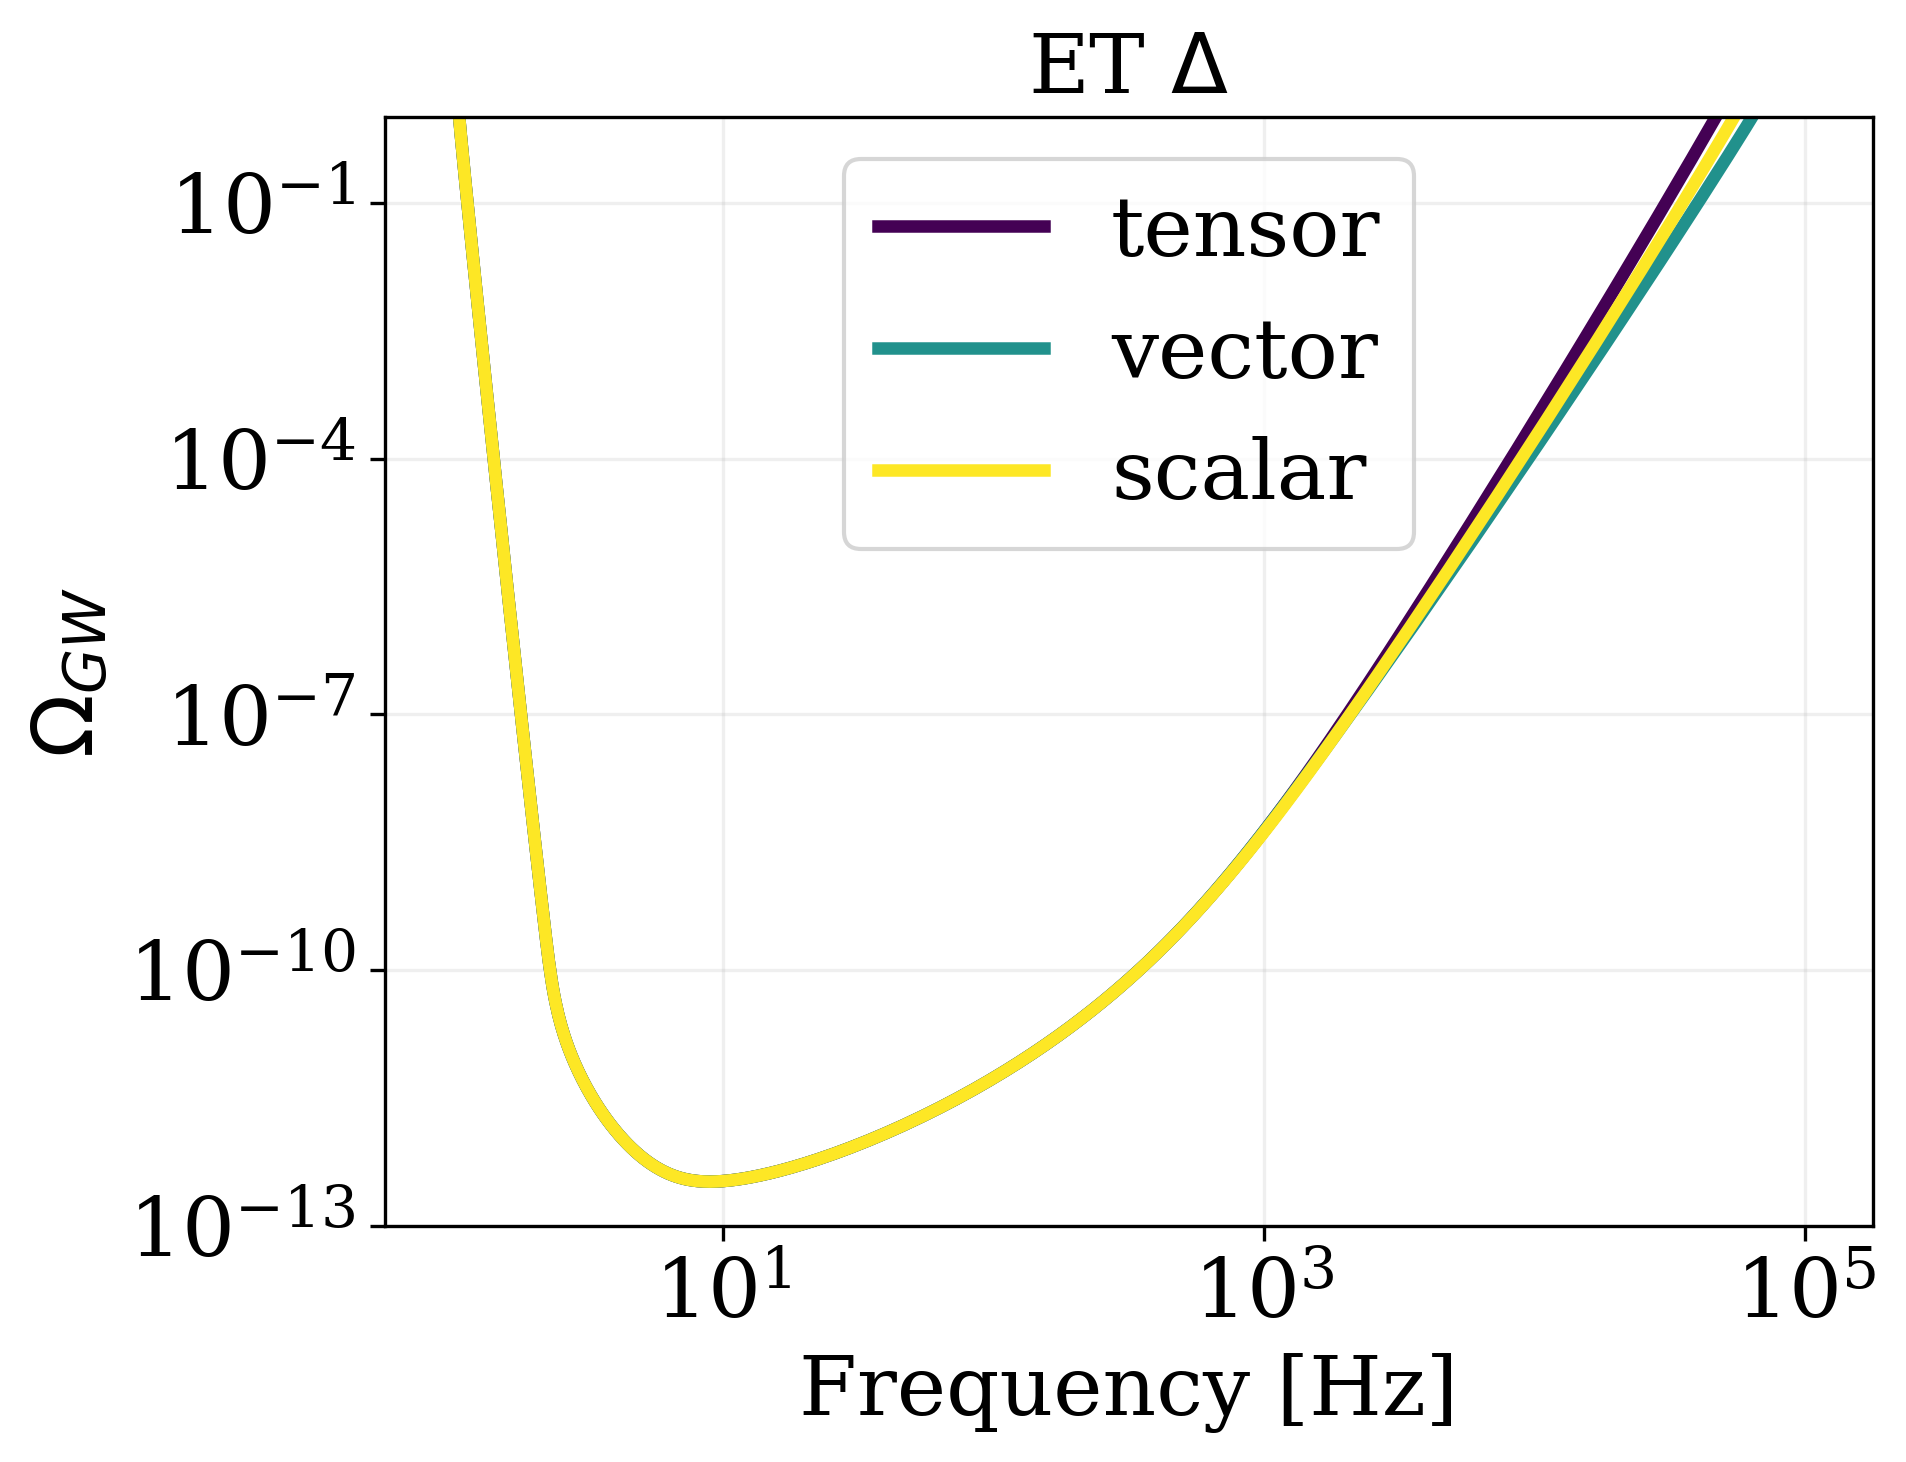

In [202]:
colors = cm.viridis(np.linspace(0, 1, 3))

plt.loglog(f, pls_weighted_ET_triang_t, label='tensor', color=colors[0])
plt.loglog(f, pls_weighted_ET_triang_v, label='vector', color=colors[1])
plt.loglog(f, pls_weighted_ET_triang_s, label='scalar', color=colors[2])

plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.legend()
plt.grid(alpha=0.2, which='both')
#plt.xlim(1, 2000)
plt.ylim(1e-13, 1e0)
plt.title(r'ET $\Delta$')
plt.show()

* ET 2L $\alpha = 0^{\circ}$

In [76]:
f = np.logspace(0, np.log10(2000), 1000)
beta_min = -80
beta_max = 80
fref = 100
snr = 1
Tobs = 1
pls_ET = pls.find_pls('ET L1', 'ET L2', f,'t', beta_min, beta_max, fref, snr, Tobs, np.deg2rad(0))

f_ref, PLS_ref = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_2L0deg_15km_HFLFcryo.txt', unpack=True)

# save f and pls_ET to file

np.savetxt('ilaria_pls_1yr_snr1_2L15km.txt', np.array([f, pls_ET]).T)

/Users/ic/Desktop/GWBird/nest/pls_try.py:16: RuntimeWarning: overflow encountered in power
  integrand = lambda f : ((f/fref)**(2*beta))/ (Omega_eff(f, PnI, PnJ, orfIJ)**2)


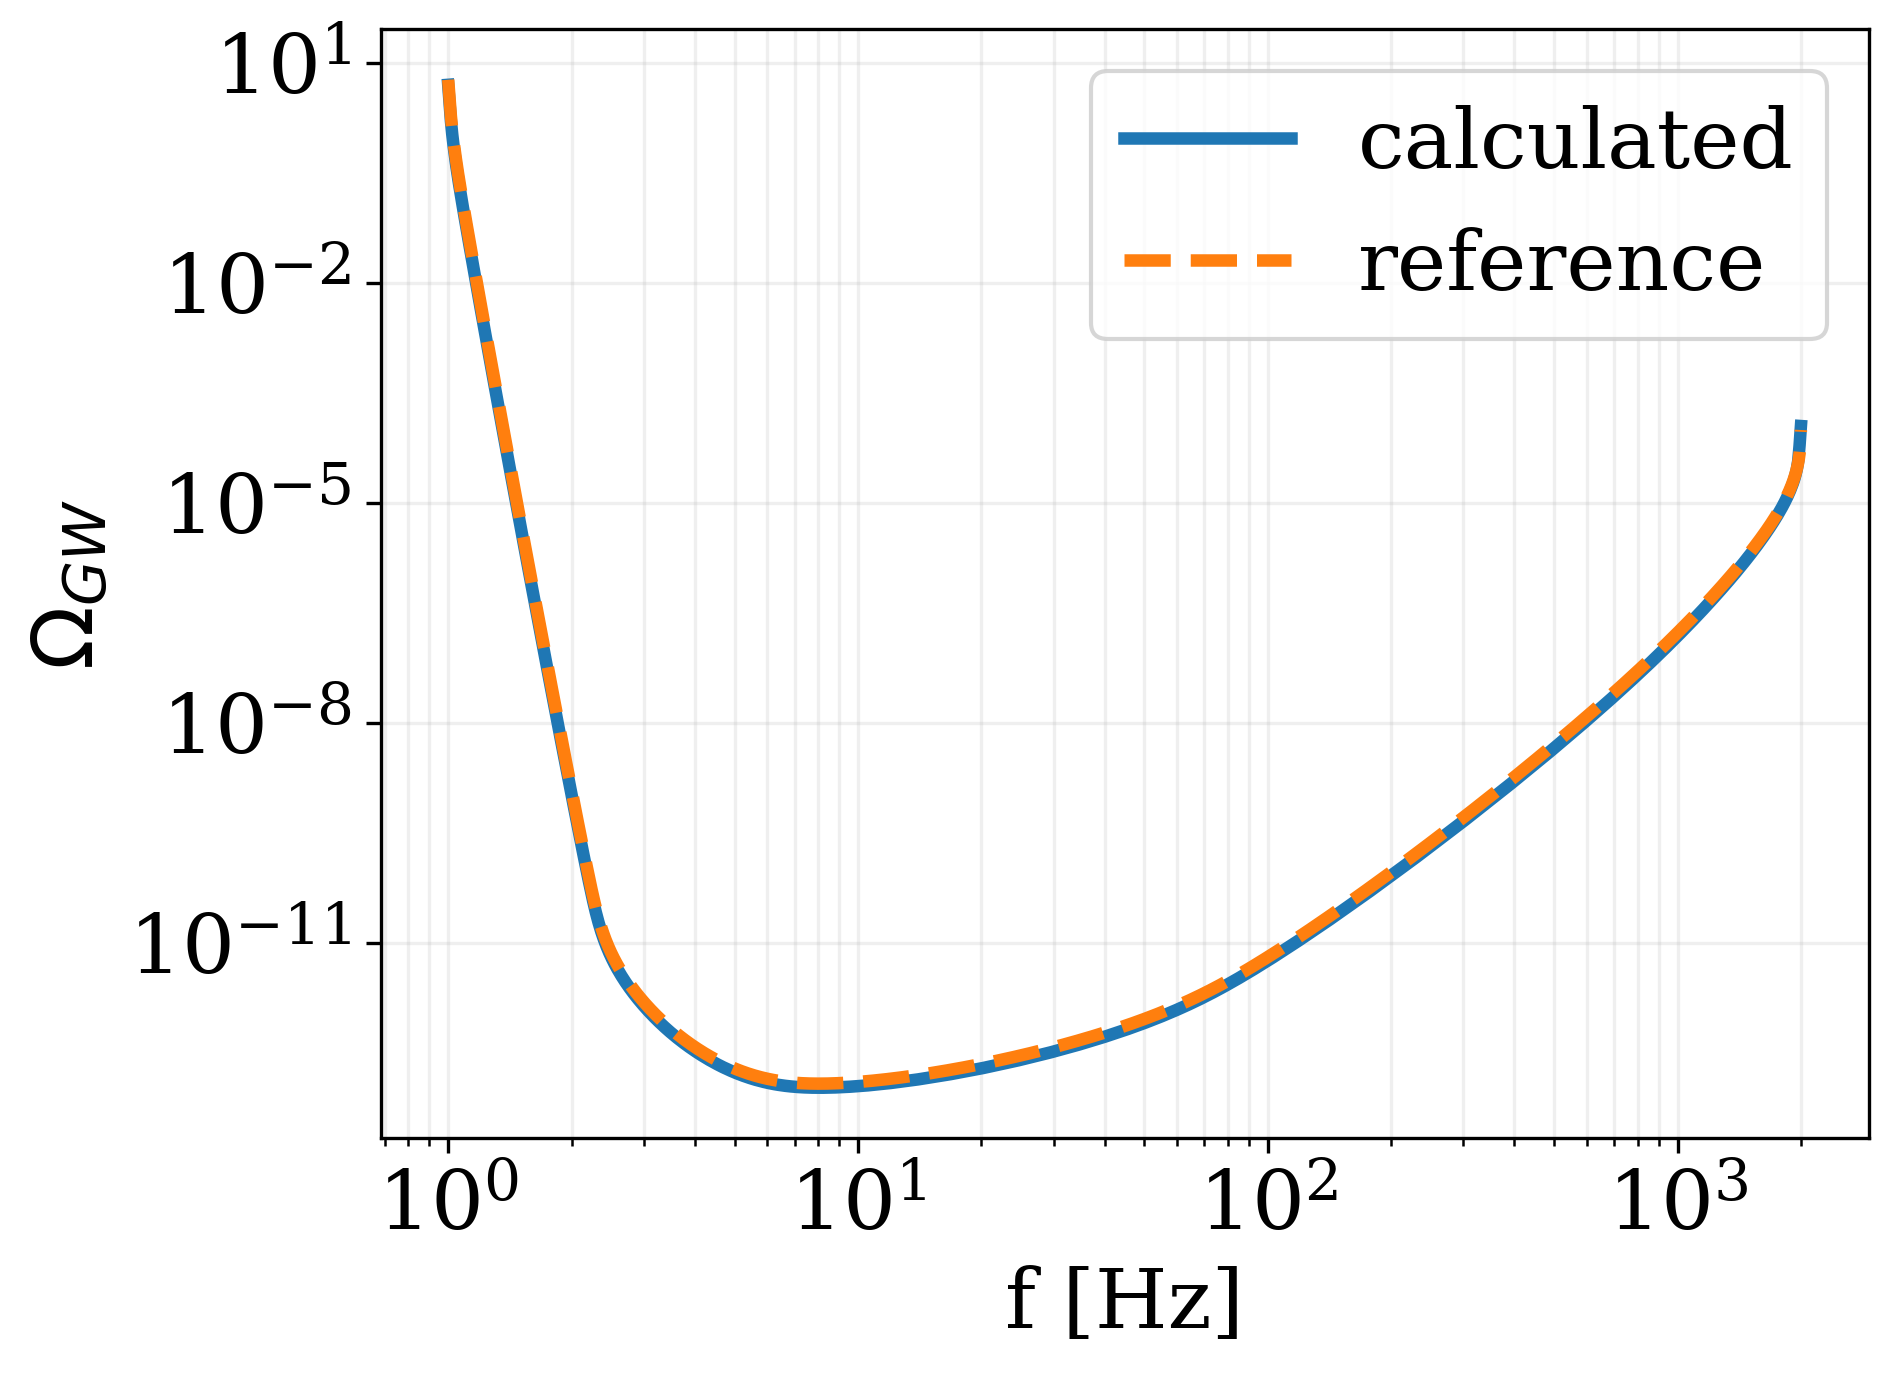

In [74]:
plt.plot(f, pls_ET, label='calculated')
plt.plot(f_ref, PLS_ref, label='reference', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.grid(alpha =0.2, which='both')
plt.show()

Note: there is agreement with the ref and weighted if I put 4 as a coefficient in Omega effective.

* ET 2L $\alpha= 47.5^{\circ}$

In [70]:
f = np.logspace(0, np.log10(2000), 1000)
beta_min = -40
beta_max = 40
fref = 25
snr = 1
Tobs = 1

pls_ET = pls.find_pls('ET L1', 'ET L2', f, 't', beta_min, beta_max, fref, snr, Tobs, np.deg2rad(42.5))
f_ref, PLS_ref = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_2L45deg_15km_HFLFcryo.txt', unpack=True)



<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
/var/folders/5d/ymf225n1541cfw2gc3hlv41w0000gn/T/ipykernel_55248/387534149.py:1: SyntaxWarning: invalid escape sequence '\c'
  plt.loglog(f, pls_ET, label='ET 2L $47.5^{\circ}$')


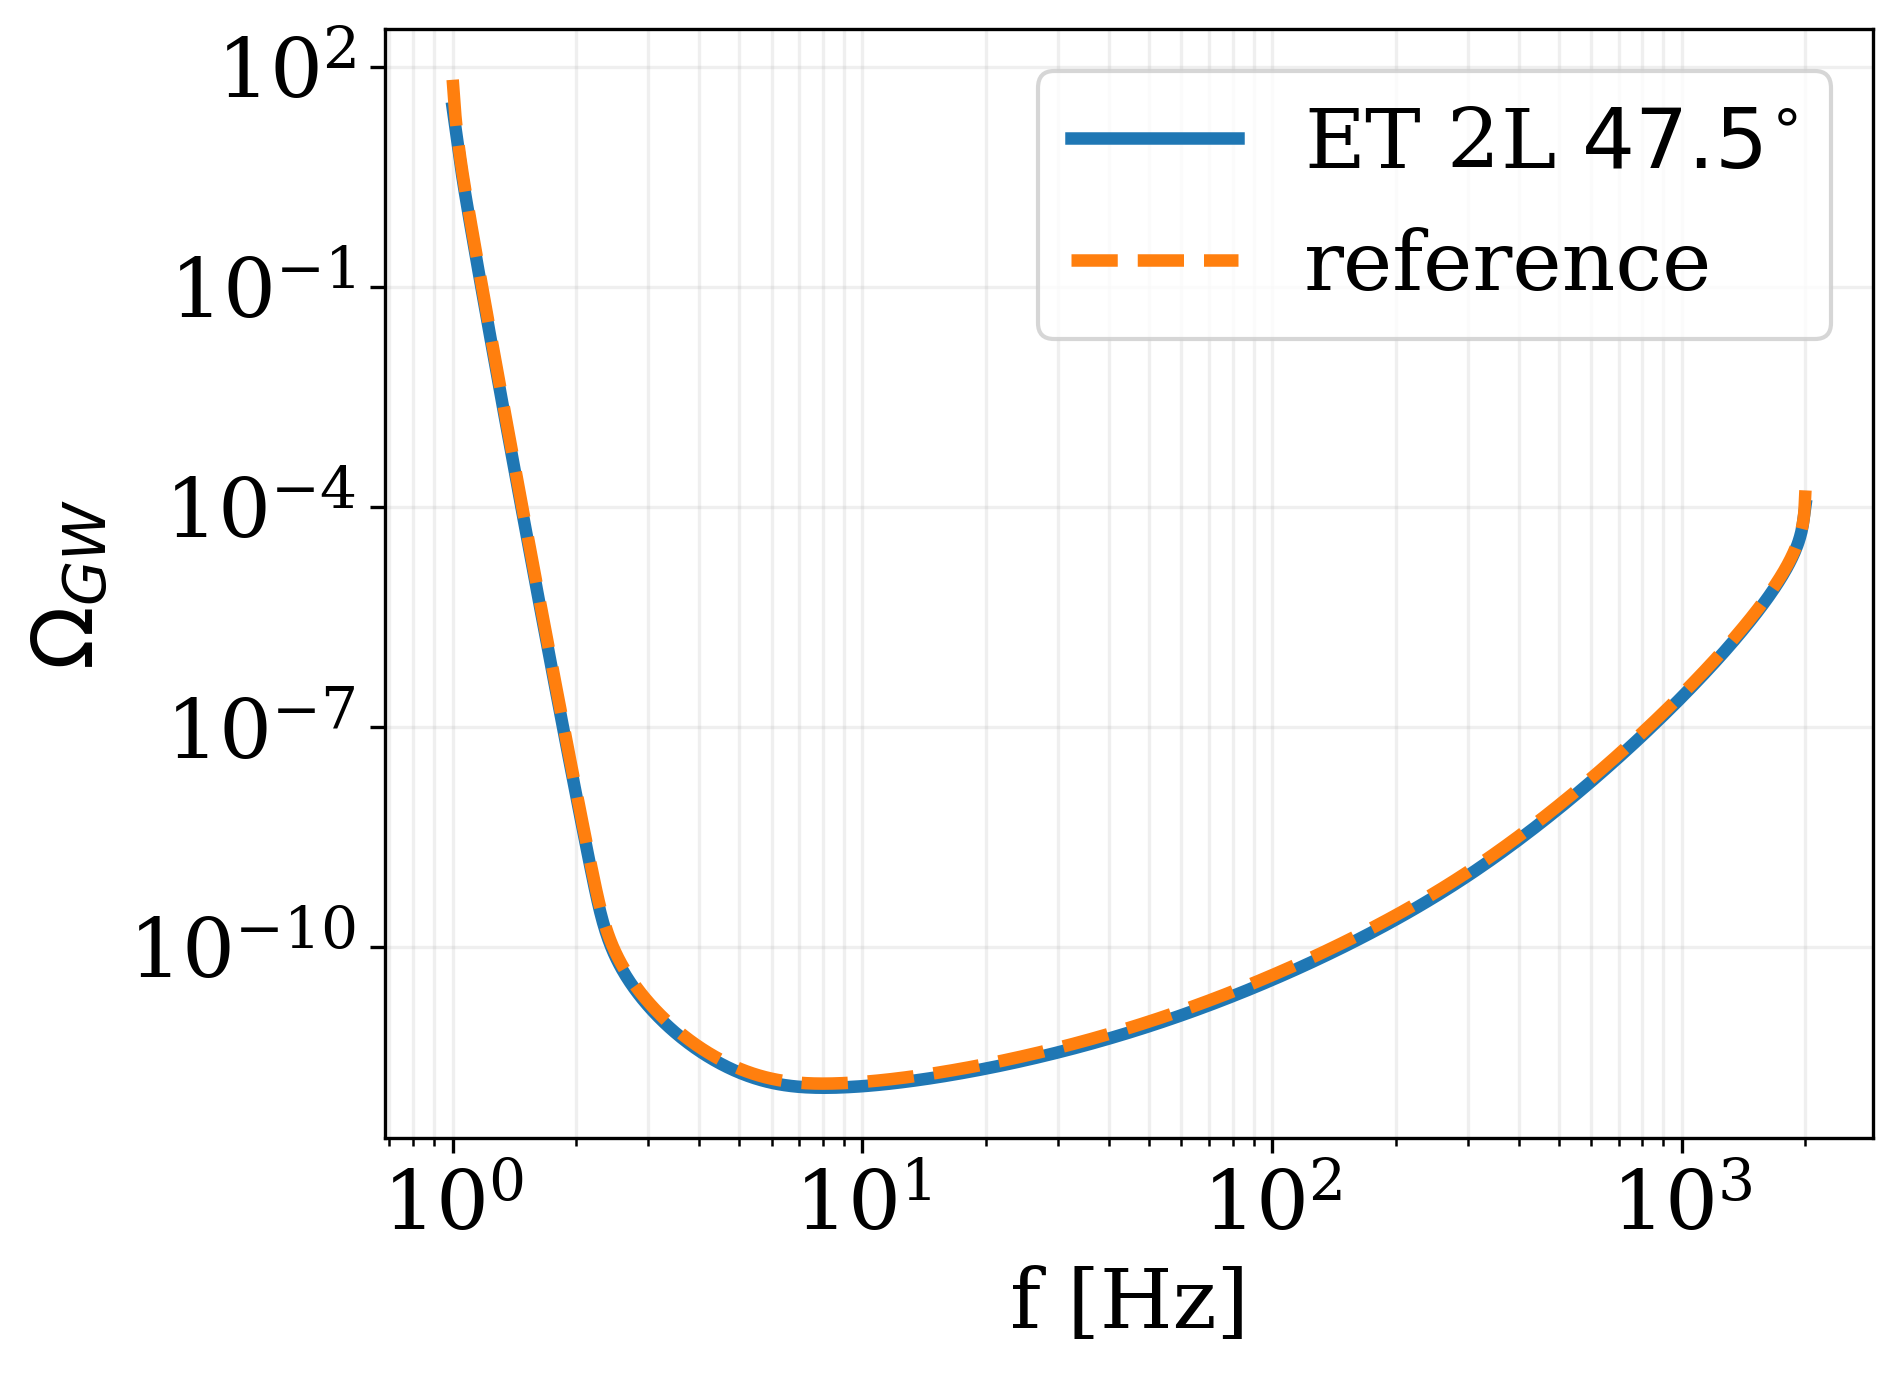

In [18]:
plt.loglog(f, pls_ET, label='ET 2L $47.5^{\circ}$')
plt.loglog(f_ref, PLS_ref, label='reference', linestyle ='--')
plt.legend()
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.grid(alpha=0.2, which='both')
plt.show()

* LISA

In [302]:
f = np.logspace(-5, 0, 1000)
beta_min = -40
beta_max = 40
fref = 1e-3
snr = 10
Tobs = 3

pls_LISA = pls.find_pls('LISA 1', 'LISA 1', f, 't', beta_min, beta_max, fref, snr, Tobs, None)

#np.savetxt('LISA_pls.txt', np.column_stack((f, pls_LISA)), header='f pls_LISA', comments='')

f_ref, PLS_ref1, PLS_ref2, PLS_ref3 = np.loadtxt('LISA_sens.txt', unpack=True, usecols=(0, 1, 2, 3))

0.29993702754754165
-0.14996851377377082
0.44990554132131244


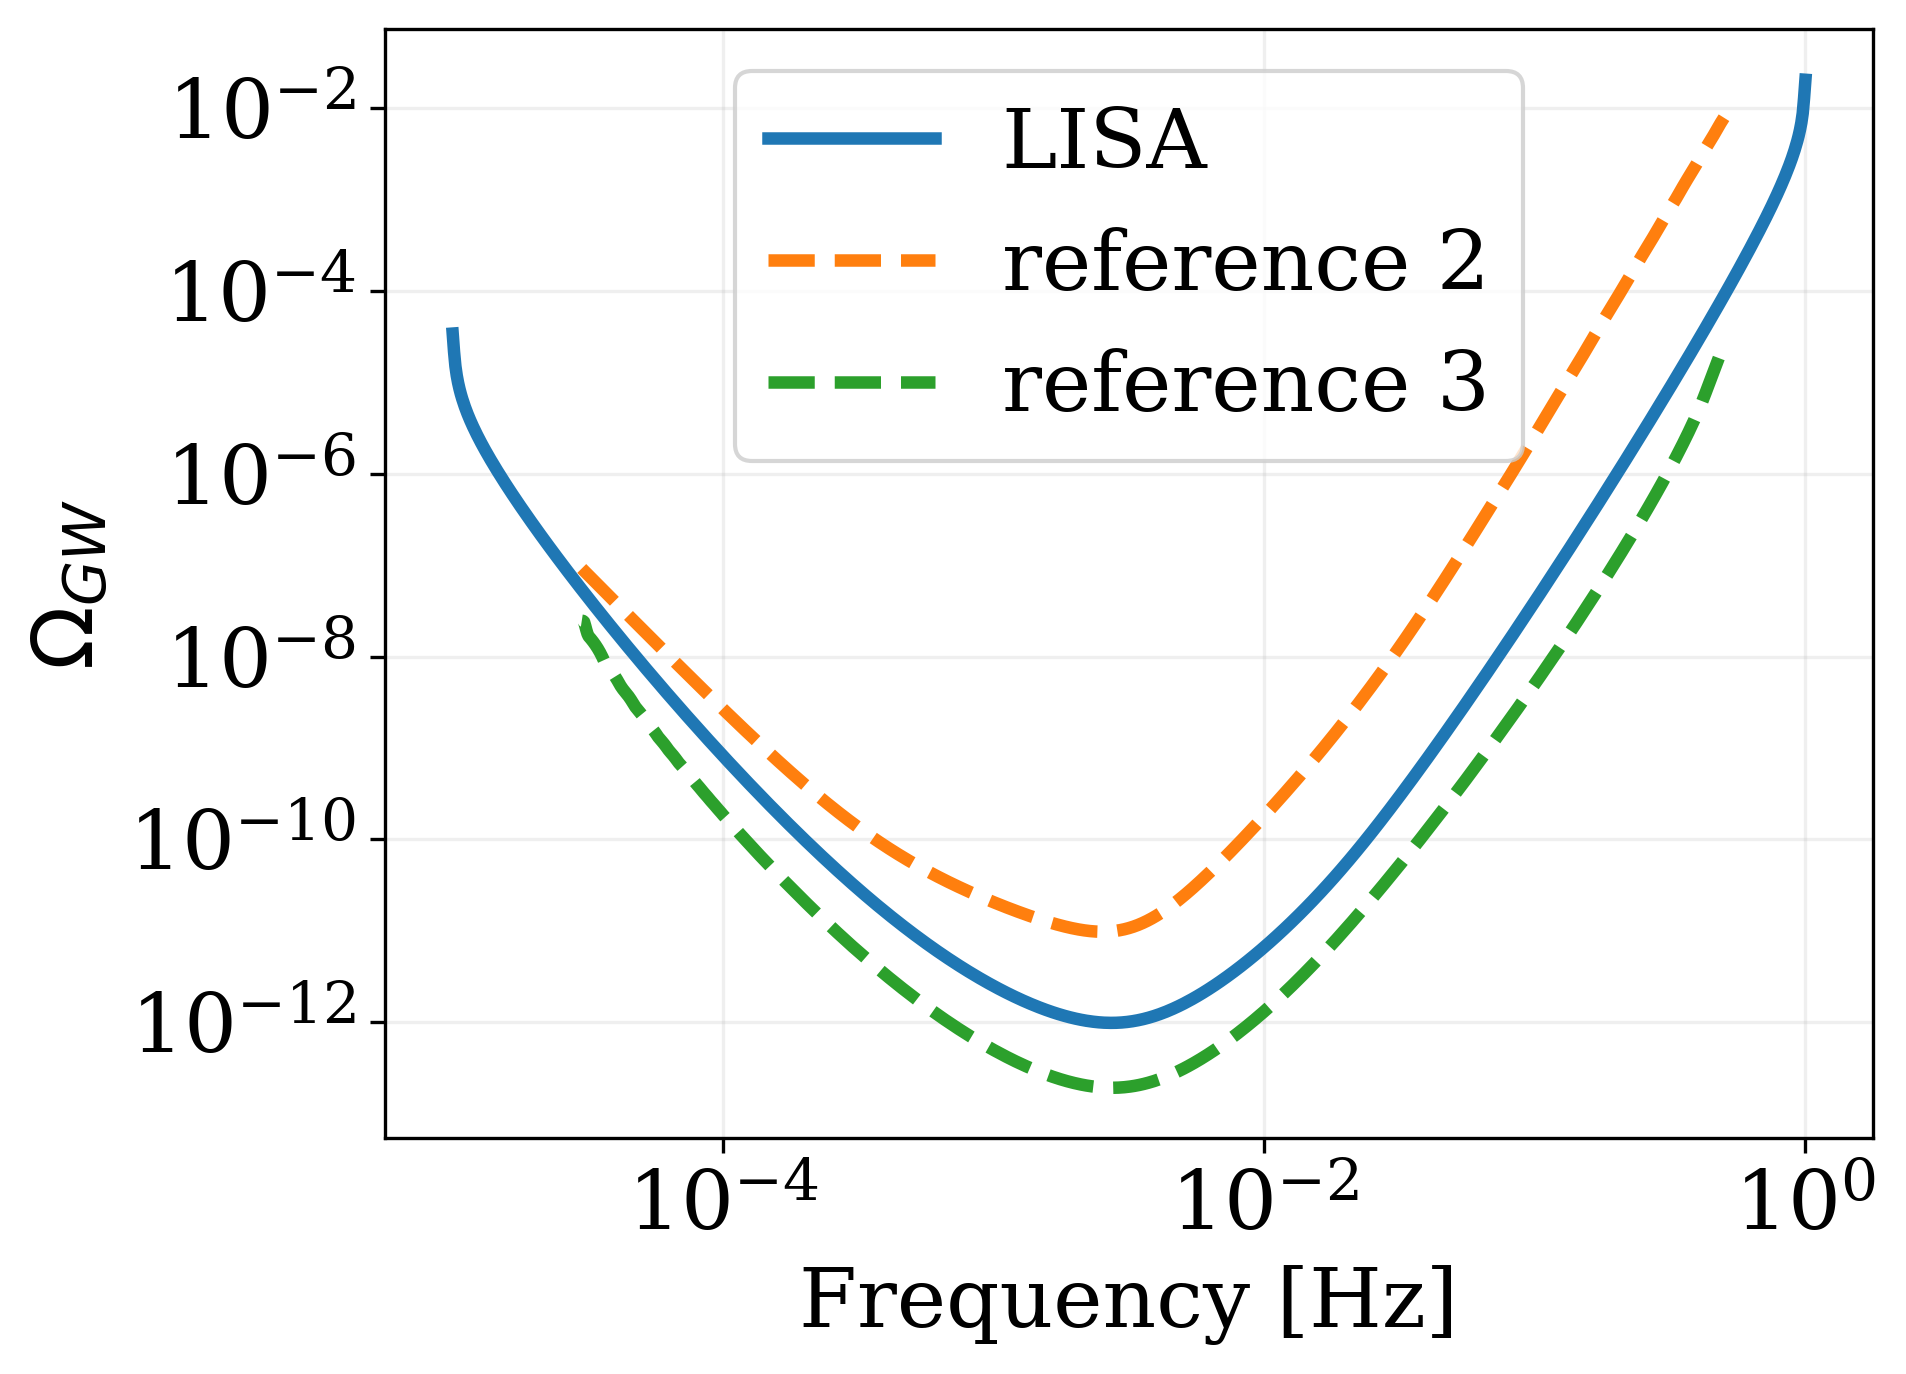

In [303]:
plt.loglog(f, pls_LISA, label='LISA')
#plt.loglog(f_ref, PLS_ref1, label='reference 1', linestyle='--')
plt.loglog(f_ref, PLS_ref2, label='reference 2', linestyle='--')
plt.loglog(f_ref, PLS_ref3, label='reference 3', linestyle='--')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.legend()
plt.grid(alpha =0.2, which='both')  
# plt.ylim(1e-13, 1e-4)
# plt.xlim(2e-5, 0.5)
plt.show()

#----------------------------------------------------

In [253]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
from nest import overlap_try as overlap
from nest import detectors   
from astropy.cosmology import Planck15

cosmo = Planck15
H0 =  cosmo.H0.to('1/s').value

def Omega_eff(f, PnI, PnJ, orfIJ):
    return ((4* np.pi**2)/(3* H0*H0)) * np.sqrt((f**6) *PnI * PnJ / (orfIJ**2))

def Omega_beta(f_range, PnI, PnJ, orfIJ, beta, fref, snr, Tobs):
    Tobs = Tobs*365*24*3600
    integrand = lambda f : ((f/fref)**(2*beta))/ (Omega_eff(f, PnI, PnJ, orfIJ)**2)
    integral = np.trapz(integrand(f_range), f_range)
    return snr / np.sqrt(2*Tobs*integral)

def Omega_GW(f_i, PnI, PnJ, orfIJ, beta, fref, snr, Tobs):
    return Omega_beta(f_i, PnI, PnJ, orfIJ, beta, fref, snr, Tobs) * ((f_i/fref)**(beta))

def all_Omega_GW(f_i, PnI, PnJ, orfIJ, beta_min, beta_max, fref, snr, Tobs):
    beta = np.linspace(beta_min, beta_max, 1000)
    Omega = []
    for i in range(len(beta)):
        Omega.append(Omega_GW(f_i, PnI, PnJ, orfIJ, beta[i], fref, snr, Tobs))
        
    return beta, np.array(Omega)

def find_pls(which_det1, which_det2, f, pol,  beta_min, beta_max, fref, snr, Tobs, shift_angle):
    
    fi, PnI = detectors.detector_Pn(which_det1)
    fj, PnJ = detectors.detector_Pn(which_det2)

    PnI = np.interp(f, fi, PnI)
    PnJ = np.interp(f, fj, PnJ)


    if (which_det1 == 'LISA 1' and which_det2 == 'LISA 1') or (which_det1 == 'LISA 2' and which_det2 == 'LISA 2') or (which_det1 == 'LISA 3' and which_det2 == 'LISA 3'):
        XX = overlap.overlap('LISA 1', 'LISA 1', f, 0, pol)#[0]  # auto
        XY = overlap.overlap('LISA 1', 'LISA 2', f, 0, pol)#[0]  # cross
        # the overlap is evaluated in the diagonal basis
        orfIJ = (np.array(XX) - 2*np.array(XY))

    else: 
        orfIJ = overlap.overlap(which_det1, which_det2, f, 0 , pol, shift_angle)
    
    beta, Omega = all_Omega_GW(f, PnI, PnJ, orfIJ, beta_min, beta_max, fref, snr, Tobs)
    
    pls = np.zeros(len(f))

    print(Omega.shape)

    for i in range(len(f)):
        pls[i] = np.max(Omega[:,i])
    return pls

def find_pls_weighted(which_det1, which_det2, f, pol, beta_min, beta_max, fref, snr, Tobs, shift_angle):
    pls1 = find_pls(which_det1, which_det2, f, pol, beta_min, beta_max, fref, snr, Tobs, shift_angle)
    return 1/( 1/pls1 + 1/pls1 + 1/pls1)


In [255]:
f = np.logspace(0, np.log10(2000), 1000)
beta_min = -40
beta_max = 40
fref = 25
snr = 1
Tobs = 1

pls_weighted_ET_triang = find_pls_weighted('ET A', 'ET B', f, 't', beta_min, beta_max, fref, snr, Tobs, None)
f_ref, PLS_ref = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_T_10km_HFLFcryo.txt', unpack=True)


(1000, 1000)


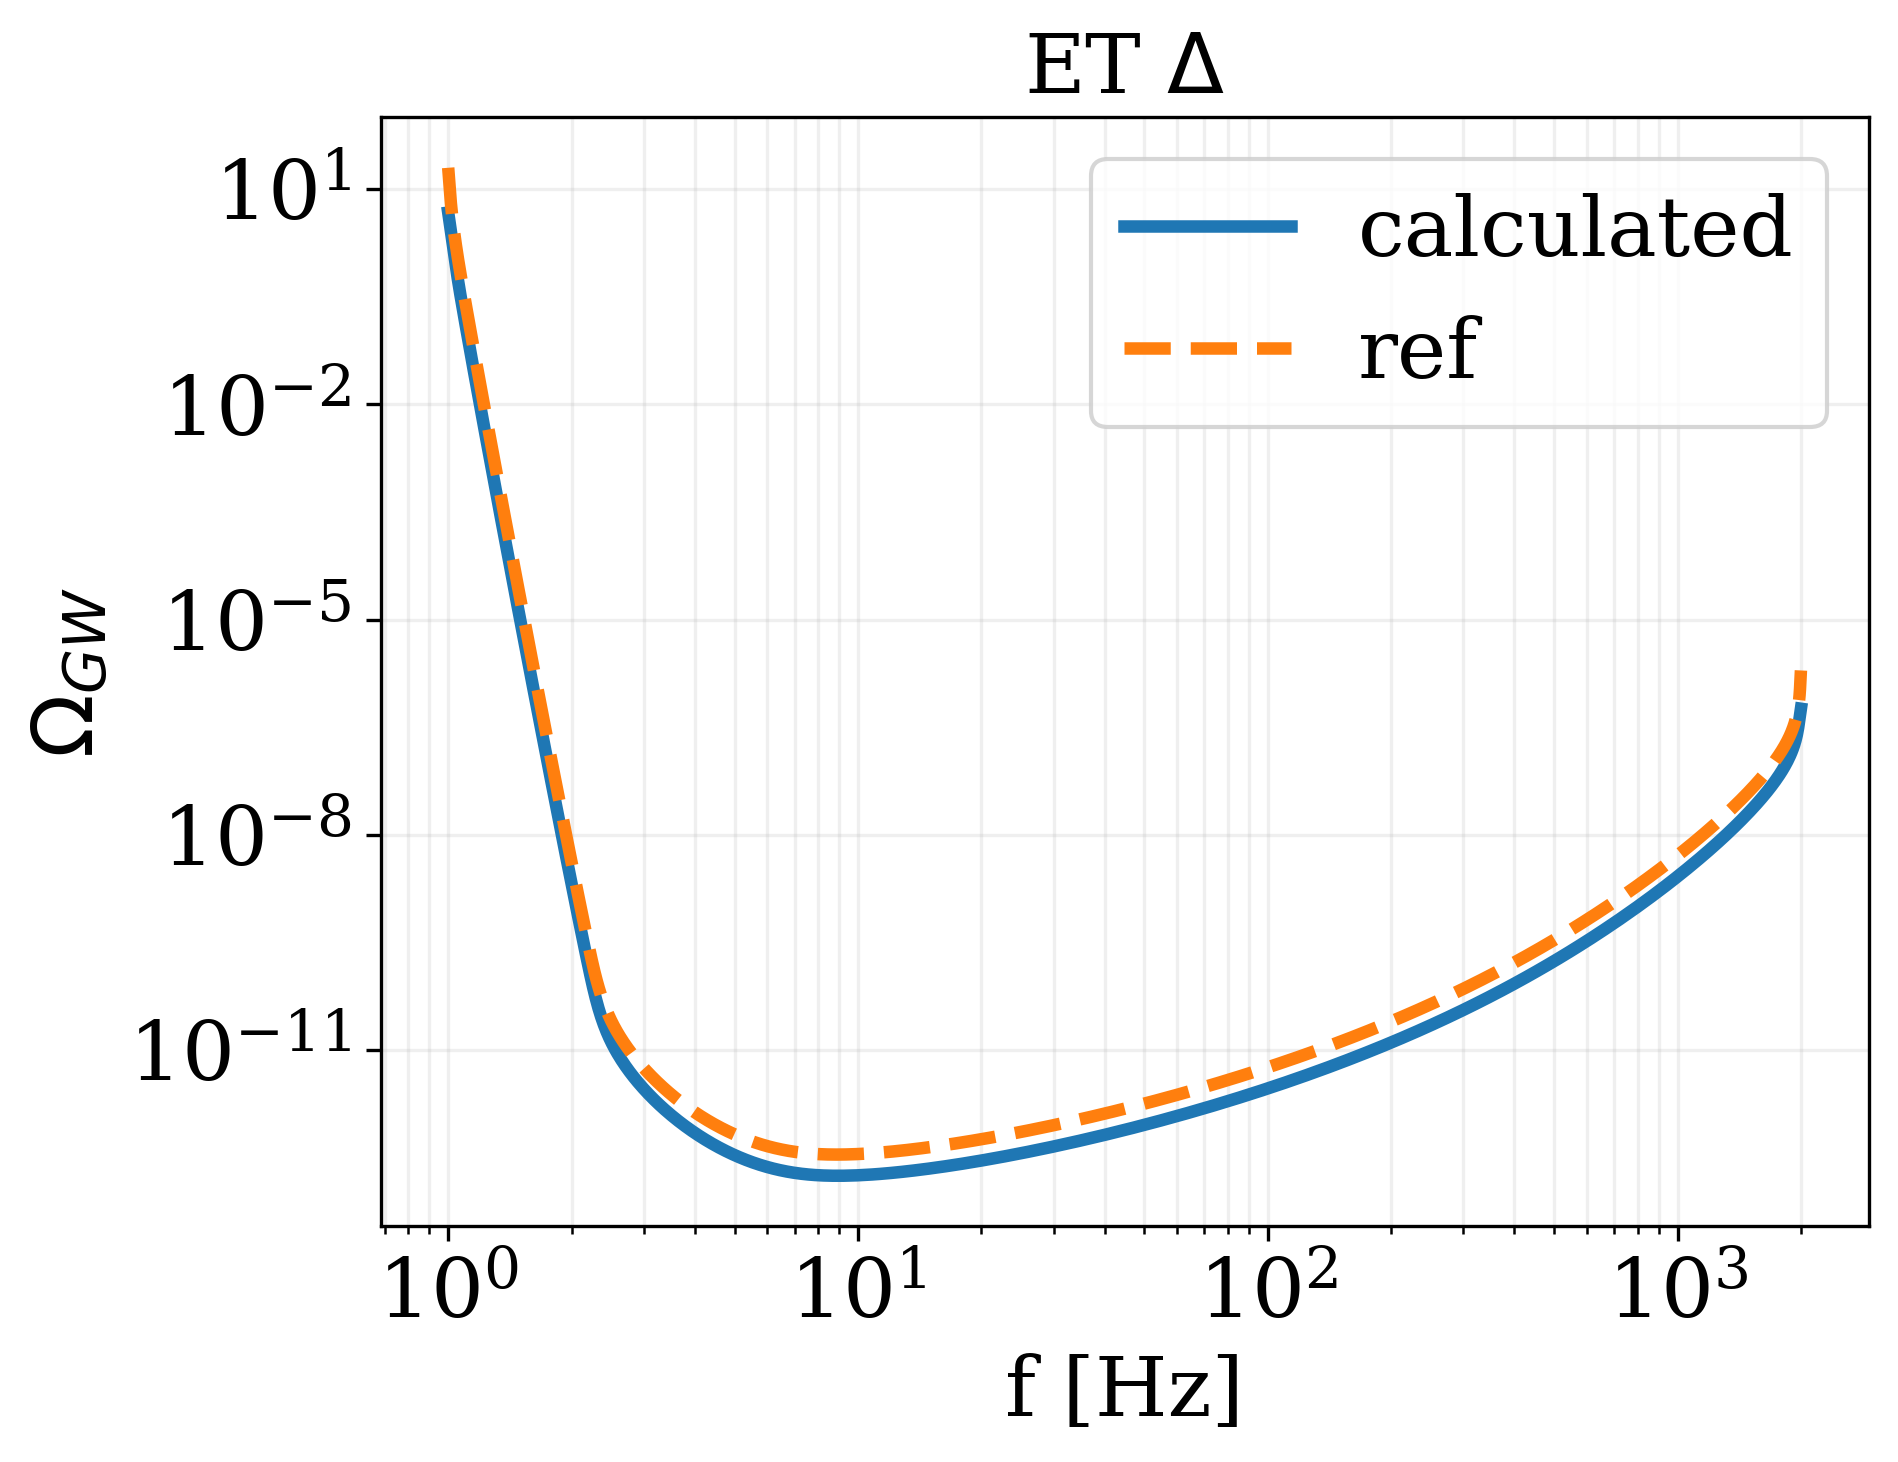

In [256]:
plt.loglog(f, pls_weighted_ET_triang, label='calculated')
plt.loglog(f_ref, PLS_ref, label='ref', linestyle = '--')
plt.legend()
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.grid(alpha =0.2, which='both')
plt.title(r'ET $\Delta$')
plt.show()

In [257]:
f = np.logspace(0, np.log10(2000), 1000)
beta_min = -80
beta_max = 80
fref = 100
snr = 1
Tobs = 1

fi, PnI = detectors.detector_Pn('ET L1')
fj, PnJ = detectors.detector_Pn('ET L2')

PnI = np.interp(f, fi, PnI)
PnJ = np.interp(f, fj, PnJ)

orfIJ = overlap.overlap('ET L1', 'ET L2', f, 0 , 't', 0)

beta, Omega = all_Omega_GW(f, PnI, PnJ, orfIJ, beta_min, beta_max, fref, snr, Tobs)

pls_ET2L0 = find_pls('ET L1', 'ET L2', f,'t', beta_min, beta_max, fref, snr, Tobs, np.deg2rad(2.51))

f_ref, PLS_ref = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_2L0deg_15km_HFLFcryo.txt', unpack=True)

/var/folders/5d/ymf225n1541cfw2gc3hlv41w0000gn/T/ipykernel_24681/3433215839.py:16: RuntimeWarning: overflow encountered in power
  integrand = lambda f : ((f/fref)**(2*beta))/ (Omega_eff(f, PnI, PnJ, orfIJ)**2)


(1000, 1000)


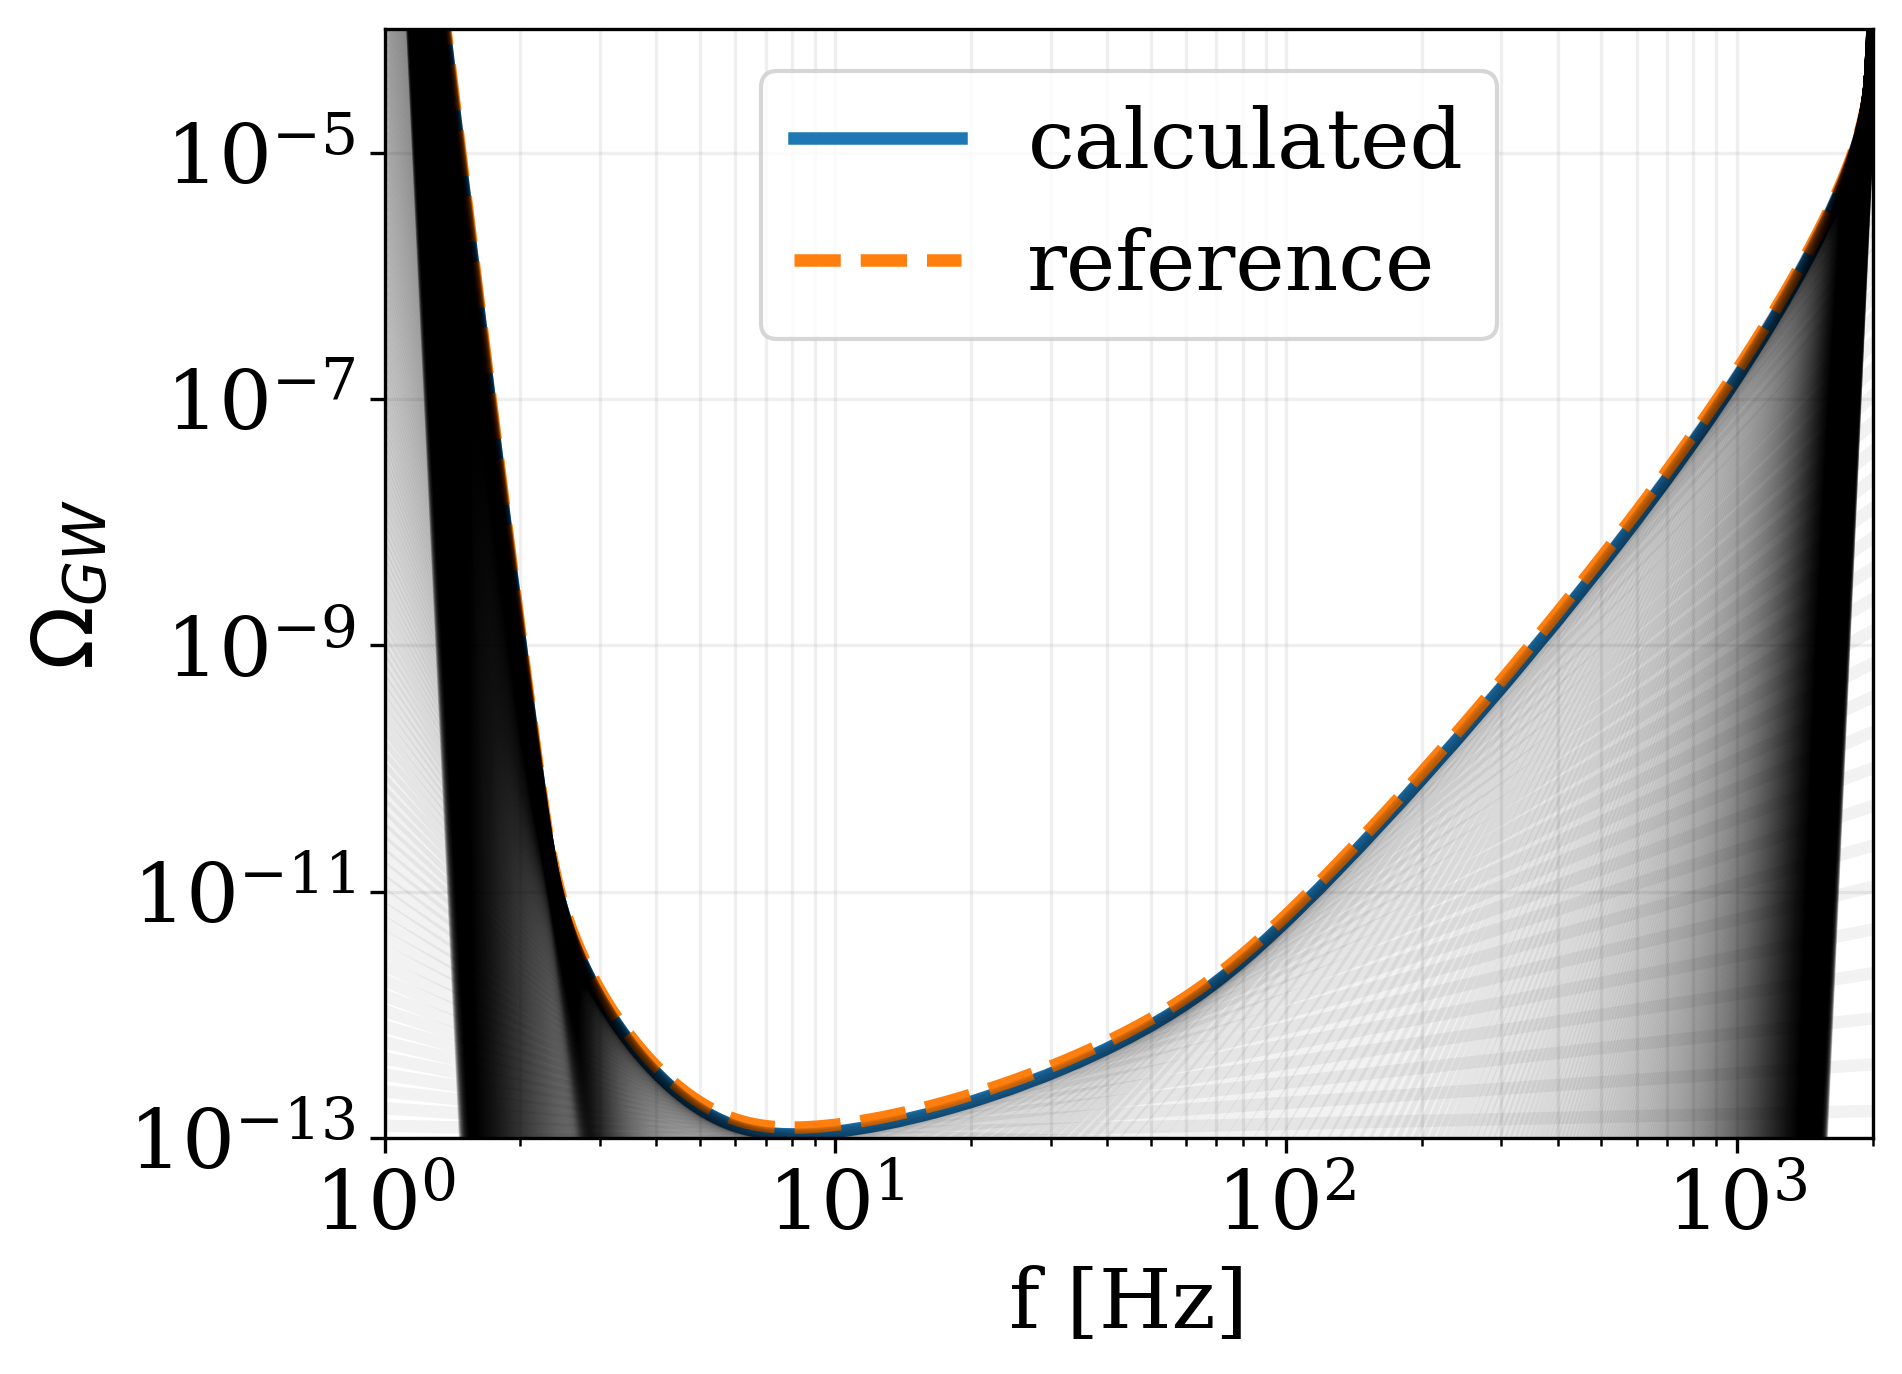

In [258]:
plt.plot(f, pls_ET2L0, label='calculated')
plt.plot(f_ref, PLS_ref, label='reference', linestyle='--')
for i in range(len(beta)):
    plt.plot(f, Omega[i], color='black', alpha=0.05)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.grid(alpha =0.2, which='both')
plt.xlim(1, 2000)
plt.ylim(1e-13, 1e-4)
plt.show()